In [2]:
import pandas as pd 
import numpy as np
from pandas_datareader import data as web
import matplotlib.pyplot as plt

In [3]:
tickers = ["PG", "^GSPC"]
data = pd.DataFrame()
for t in tickers:
    data[t] = web.DataReader(t, data_source = "yahoo", start = "2012-1-1", end = "2016-12-31")["Adj Close"]

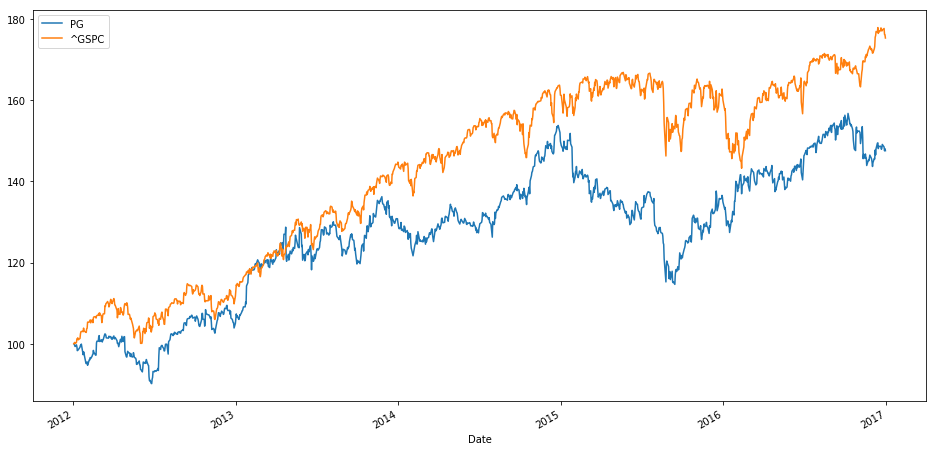

In [5]:
#normalize the data
(data/data.iloc[0]* 100).plot(figsize=(16,8))
plt.show()

In [6]:
#calculate the simple returns 
simple_returns = (data/data.shift(1)) -1 

In [7]:
simple_returns.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2012-01-03 to 2016-12-30
Data columns (total 2 columns):
PG       1257 non-null float64
^GSPC    1257 non-null float64
dtypes: float64(2)
memory usage: 29.5 KB


In [8]:
simple_returns.tail()

,PG,^GSPC
Date,,
2016-12-23,0.005801,0.001252
2016-12-27,-0.004237,0.002248
2016-12-28,-0.006265,-0.008357
2016-12-29,0.003330,-0.000293
2016-12-30,-0.003201,-0.004637


In [9]:
port_cov = simple_returns.cov() * 250

In [10]:
port_cov

,PG,^GSPC
PG,0.020391,0.010072
^GSPC,0.010072,0.016340


In [11]:
pg_cov_toMarket = port_cov.iloc[0,1]
pg_cov_toMarket

0.010072020704296315

In [12]:
Market_Var = simple_returns["^GSPC"].var() * 250
Market_Var

0.016339900880162326

In [13]:
BetaValue = pg_cov_toMarket/Market_Var
BetaValue

0.6164064750554507

This tells us that PG is a defensive stock. Meaning that when the market declines PG will decline but not significantly. When the market recovers PG will recover slightly. 